In [1]:
print("MLOps Zoomcamp Module 1")
!pip install pyarrow

MLOps Zoomcamp Module 1


In [2]:
import pandas as pd
df = pd.read_parquet("./data/green_tripdata_2022-01.parquet")
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [80]:
df_vali = pd.read_parquet("./data/green_tripdata_2022-02.parquet")
df_vali.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,0.5,0.5,1.02,0.0,None,0.3,7.82,1.0,1.0,0.00
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,0.5,0.5,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,0.0,0.5,0.00,0.0,None,0.3,43.00,1.0,1.0,0.00
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,0.5,0.5,0.00,0.0,None,0.3,50.30,2.0,1.0,0.00
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,0.5,0.5,4.50,0.0,None,0.3,29.55,1.0,1.0,2.75


## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "**Green** Taxi Trip Records", we'll use "**Yellow** Taxi Trip Records".

Download the data for January and February 2022.

Read the data for January. How many columns are there?

In [107]:
print(f"January 2022 has {df.shape[1]} columns")
print(f"Total number of rows: {df.shape[0]}")
df.dtypes

print(f"February 2022 has {df_vali.shape[1]} columns")
print(f"Total number of rows: {df_vali.shape[0]}")
df_vali.dtypes


January 2022 has 21 columns
Total number of rows: 59603
February 2022 has 21 columns
Total number of rows: 66097


VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the standard deviation of the trips duration in January?

* 41.45
* 46.45
* 51.45
* 56.45

In [4]:
df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda time: round(time.total_seconds()/60, 2))
print(f"The standard deviation of the trips duration in January 2022 is {round(df.duration.std(), 2)}")
df.head()

The standard deviation of the trips duration in January 2022 is 78.22


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,1.20
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,8.72
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,16.20
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,8.25
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,21.03


## Q3. Dropping outliers

Next, we need to check the distribution of the `duration` variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

* 90%
* 92%
* 95%
* 98%

Total number of rows: 62495
Dropping lower limit outliers: 2068
Dropping upper limit outliers: 824
Fraction of the records left after you dropped the outliers: 95.4%


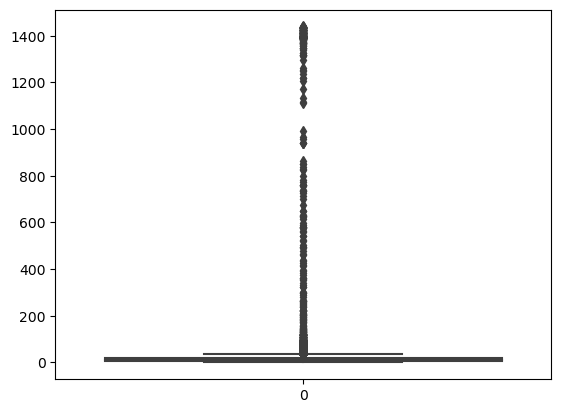

In [6]:
import seaborn as sns
sns.boxplot(df["duration"])
num_rows = df.shape[0]
lower_limit = 1
upper_limit = 60
print(f"Total number of rows: {num_rows}")
outliers_lower_limit = (df["duration"] < lower_limit)
outliers_upper_limit = (df["duration"] > upper_limit)
outliers_lower_limit
len_lower = len(df['duration'][outliers_lower_limit])
len_upper = len(df['duration'][outliers_upper_limit])
print(f"Dropping lower limit outliers: {len_lower}")
print(f"Dropping upper limit outliers: {len_upper}")
percent_left = ((num_rows - len_lower - len_upper)/num_rows * 100)
print(f"Fraction of the records left after you dropped the outliers: {round(percent_left, 1)}%")

In [7]:
# the outliers
df['duration'][(outliers_lower_limit | outliers_upper_limit)]

13       1380.07
20          0.92
29          0.03
56          0.28
76        382.72
          ...   
62254      69.00
62265      66.00
62360     146.00
62380      67.00
62402      62.00
Name: duration, Length: 2892, dtype: float64

In [8]:
# without the outliers
df['duration'][~(outliers_lower_limit | outliers_upper_limit)]

0         1.20
1         8.72
2        16.20
3         8.25
4        21.03
         ...  
62490     8.00
62491    18.00
62492    19.00
62493    10.00
62494    34.00
Name: duration, Length: 59603, dtype: float64

In [9]:
# now we remove them... 
df = df[~(outliers_lower_limit)]
df = df[~(outliers_upper_limit)]
df.reindex()
print(f"Total number of rows, after removing outliers: {df.shape[0]}")

Total number of rows, after removing outliers: 59603


/tmp/ipykernel_4098/965565784.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(outliers_upper_limit)]


<Axes: >

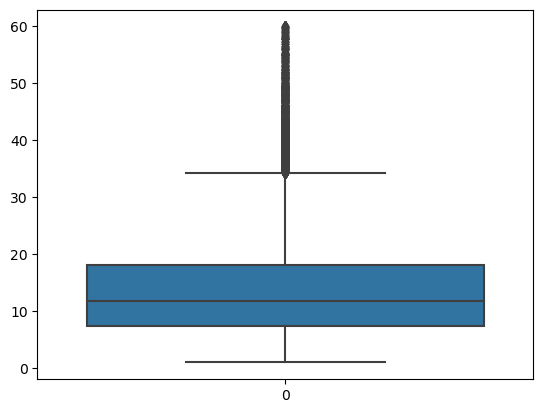

In [10]:
sns.boxplot(df["duration"])

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

* 2
* 155
* 345
* 515
* 715

In [127]:
from sklearn.feature_extraction import DictVectorizer # <== use this to create a sparse one hot encoding of categorical variables
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# we only use 3 features for our model
# pick up and drop off location need to be either categories or strings so that
# the DictVectorizer's one-hot encoding to work. It will not work if we keep them as 
# numbers. 
print(f"Pick up locations: {len(df['PULocationID'].unique())}")
print(f"Drop off up locations: {len(df['DOLocationID'].unique())}")
df["PULocationID"] = df["PULocationID"].astype("str")
df["DOLocationID"] = df["DOLocationID"].astype("str")

df_test = df[["PULocationID", "DOLocationID", "trip_distance"]]
train_dicts = df_test.to_dict(orient='records')
print(df_test.dtypes)
print(f"train_dicts looks like: {train_dicts[:2][1]}")

dv = DictVectorizer()
# now we convert the dictionary with one hot encoding for the categorical features
# and no conversion for the other features
X_train = dv.fit_transform(train_dicts)
# how does an intem in a sparse array look like? 
# print(X_train.toarray()[:1])
print(f"Shape of the sparse matrix (row, col): {X_train.shape}")

Pick up locations: 230
Drop off up locations: 240
PULocationID      object
DOLocationID      object
trip_distance    float64
dtype: object
train_dicts looks like: {'PULocationID': '116', 'DOLocationID': '41', 'trip_distance': 2.1}
Shape of the sparse matrix (row, col): (59603, 471)


## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?

* 6.99
* 11.99
* 16.99
* 21.99

In [101]:
# remember the duration we calcluated from start and end time? We can use it
# as a target of the prediction... 
y_train = df["duration"].values

lr = LinearRegression()
lr.fit(X_train, y_train) # <=== Training time for all X_train values... 

print(f"shape: {X_train.shape}")
y_pred = lr.predict(X_train)

# then calculate the RMSE between X_train and y_pred values
print(f"RMSE: {round(mean_squared_error(y_train, y_pred, squared=False), 4)} mins")

shape: (59603, 471)
RMSE: 7.7358 mins


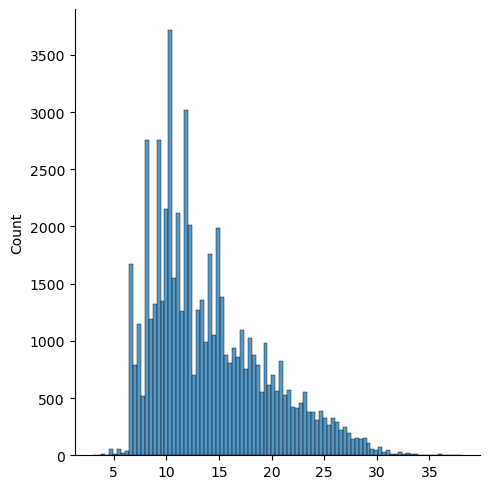

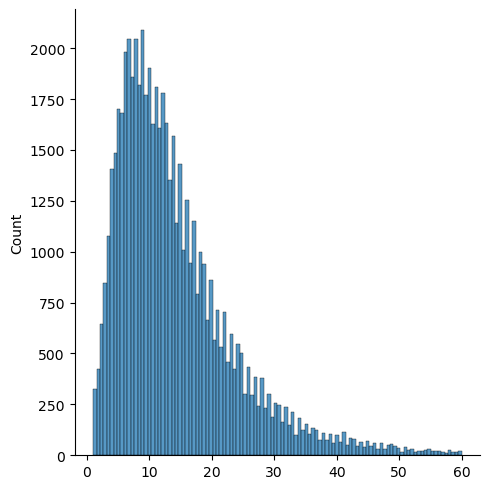

In [73]:
sns.displot(y_pred)
sns.displot(y_train)

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2022). 

What's the RMSE on validation?

* 7.79
* 12.79
* 17.79
* 22.79

In [129]:
df_vali["duration"] = df_vali.lpep_dropoff_datetime - df_vali.lpep_pickup_datetime
df_vali.duration = df_vali.duration.apply(lambda time: round(time.total_seconds()/60, 2))
outliers_lower_limit = (df_vali["duration"] < lower_limit)
outliers_upper_limit = (df_vali["duration"] > upper_limit)
print(df_vali.shape)

df_vali = df_vali[~(outliers_lower_limit)]
df_vali = df_vali[~(outliers_upper_limit)]
df_vali.reindex()

df_vali["PULocationID"] = df_vali["PULocationID"].astype("category")
df_vali["DOLocationID"] = df_vali["DOLocationID"].astype("category")
print(f"Pick up locations: {len(df_vali['PULocationID'].unique())}")
print(f"Drop off up locations: {len(df_vali['DOLocationID'].unique())}")
# TODO: check why train and validation have different number of categorical types... 
# print(df_vali)

df_validation = df_vali[["PULocationID", "DOLocationID", "trip_distance"]]
print(df_validation.dtypes)
vali_dicts = df_validation.to_dict(orient='records')
print(f"vali_dicts looks like: {vali_dicts[:2]}")

dv_v = DictVectorizer()
# now we convert the dictionary with one hot encoding for the categorical features
# and no conversion for the other features
X_vali = dv_v.fit_transform(vali_dicts)

print(f"shape: {X_vali.shape}")
# y_pred = lr.predict(X_vali)

# y_val = df_vali["duration"].values
# print(df_vali.head())
# print(f"RMSE: {round(mean_squared_error(y_val, y_pred, squared=False), 4)} mins")

(66097, 21)
Pick up locations: 225
Drop off up locations: 242
PULocationID     category
DOLocationID     category
trip_distance     float64
dtype: object
vali_dicts looks like: [{'PULocationID': '43', 'DOLocationID': '238', 'trip_distance': 1.16}, {'PULocationID': '166', 'DOLocationID': '24', 'trip_distance': 0.57}]
shape: (66097, 468)


## Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.






## Submit the results

* Submit your results here: https://forms.gle/uYTnWrcsubi2gdGV7
* You can submit your solution multiple times. In this case, only the last submission will be used
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 23 May 2023 (Tuesday), 23:00 CEST (Berlin time). 

After that, the form will be closed.